# **CS M148 Project Check-In 4**

## Step 1. For the data set you have chosen and the binary categorical response variable that you had chosen for Check-In 3 for a logistic regression or another binary variable in your data set, apply the KNN algorithm or Random Forest Algorithm for classification.(The variable chosen does not have to be directly related to the final goal of your project.)

Our binary categorical response variable is Extracurricular_Activities (yes/no -- does the student participate in extracurricular activities or not?)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.feature_selection import SelectFromModel

pd.set_option('display.max_columns', None)
pd.options.mode.copy_on_write = True

In [ ]:
# Using the URL for the file
url = 'https://raw.githubusercontent.com/gengon7/CSM148-Data/refs/heads/main/StudentPerformanceFactors.csv'

# Read the CSV file from the URL
student_performance_factors = pd.read_csv(url)

student_performance_factors.head(5)
student_performance_factors.shape

(6607, 20)

In [ ]:
num_cols = student_performance_factors.select_dtypes(include=np.number).columns
cat_cols = student_performance_factors.select_dtypes(exclude=np.number).columns

print("Proportion of missingness for numeric variables:")
print(student_performance_factors[num_cols].isna().sum()/len(student_performance_factors))
print()
print("Proportion of missingness for categorical variables:")
print(student_performance_factors[cat_cols].isna().sum()/len(student_performance_factors))


## Since a very small percentage of values are missing for these variables, we would not lose a significant amount of data by dropping the rows with missing values
miss_cat_cols = ["Teacher_Quality","Parental_Education_Level","Distance_from_Home"]
student_performance_factors = student_performance_factors.dropna(subset=miss_cat_cols)

Proportion of missingness for numeric variables:
Hours_Studied        0.0
Attendance           0.0
Sleep_Hours          0.0
Previous_Scores      0.0
Tutoring_Sessions    0.0
Physical_Activity    0.0
Exam_Score           0.0
dtype: float64

Proportion of missingness for categorical variables:
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Family_Income                 0.000000
Teacher_Quality               0.011806
School_Type                   0.000000
Peer_Influence                0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      0.013622
Distance_from_Home            0.010141
Gender                        0.000000
dtype: float64


### ordinal
  
Parental_Involvement

Access_to_Resources

Motivation_Level


Family_Income

Teacher_Quality

Distance_from_Home

Peer_Influence

Parental_Education_Level

### nominal

#### binary

Extracurricular_Activities

Internet_Access

Learning_Disabilities

Gender

School_Type



In [ ]:
# encoding
Ordinal_cols = ["Parental_Involvement","Access_to_Resources","Motivation_Level","Family_Income","Teacher_Quality","Distance_from_Home", "Peer_Influence", "Parental_Education_Level"]
ord_enc = OrdinalEncoder(categories=[
    ["Low", "Medium", "High"],
    ["Low", "Medium", "High"],
    ["Low", "Medium", "High"],
    ["Low", "Medium", "High"],
    ["Low", "Medium", "High"],
    ["Near", "Moderate", "Far"],
    ["Negative", "Neutral", "Positive"],
    ["High School", "College", "Postgraduate"]
])

student_performance_factors[Ordinal_cols] = ord_enc.fit_transform(student_performance_factors[Ordinal_cols])

binary_cols = ["Extracurricular_Activities","Internet_Access","Learning_Disabilities","Gender","School_Type"]

for col in binary_cols:
    le = LabelEncoder()
    student_performance_factors[col] = le.fit_transform(student_performance_factors[col])

spf = student_performance_factors

student_performance_factors.head(5)

spf.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0.0,2.0,0,7,73,0.0,1,0,0.0,1.0,1,2.0,3,0,0.0,0.0,1,67
1,19,64,0.0,1.0,0,8,59,0.0,1,2,1.0,1.0,1,0.0,4,0,1.0,1.0,0,61
2,24,98,1.0,1.0,1,7,91,1.0,1,2,1.0,1.0,1,1.0,4,0,2.0,0.0,1,74
3,29,89,0.0,1.0,1,8,98,1.0,1,1,1.0,1.0,1,0.0,4,0,0.0,1.0,1,71
4,19,92,1.0,1.0,1,6,65,1.0,1,3,1.0,2.0,1,1.0,4,0,1.0,0.0,0,70


In [ ]:
scaler = MinMaxScaler()
sc_spf = spf
sc_spf[num_cols] = scaler.fit_transform(sc_spf[num_cols])
sc_spf.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.511628,0.600,0.0,2.0,0,0.500000,0.46,0.0,1,0.000,0.0,1.0,1,2.0,0.500000,0,0.0,0.0,1,0.260870
1,0.418605,0.100,0.0,1.0,0,0.666667,0.18,0.0,1,0.250,1.0,1.0,1,0.0,0.666667,0,1.0,1.0,0,0.130435
2,0.534884,0.950,1.0,1.0,1,0.500000,0.82,1.0,1,0.250,1.0,1.0,1,1.0,0.666667,0,2.0,0.0,1,0.413043
3,0.651163,0.725,0.0,1.0,1,0.666667,0.96,1.0,1,0.125,1.0,1.0,1,0.0,0.666667,0,0.0,1.0,1,0.347826
4,0.418605,0.800,1.0,1.0,1,0.333333,0.30,1.0,1,0.375,1.0,2.0,1,1.0,0.666667,0,1.0,0.0,0,0.326087


In [ ]:
scaler2 = StandardScaler()
sc_spf2 = spf
sc_spf2[num_cols] = scaler2.fit_transform(sc_spf2[num_cols])
sc_spf2.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.505079,0.344520,0.0,2.0,0,-0.023819,-0.143491,0.0,1,-1.211858,0.0,1.0,1,2.0,0.026516,0,0.0,0.0,1,-0.064416
1,-0.163260,-1.387109,0.0,1.0,0,0.657418,-1.115763,0.0,1,0.409036,1.0,1.0,1,0.0,0.998480,0,1.0,1.0,0,-1.597410
2,0.672163,1.556661,1.0,1.0,1,-0.023819,1.106573,1.0,1,0.409036,1.0,1.0,1,1.0,0.998480,0,2.0,0.0,1,1.724077
3,1.507587,0.777428,0.0,1.0,1,0.657418,1.592709,1.0,1,-0.401411,1.0,1.0,1,0.0,0.998480,0,0.0,1.0,1,0.957580
4,-0.163260,1.037172,1.0,1.0,1,-0.705056,-0.699075,1.0,1,1.219483,1.0,2.0,1,1.0,0.998480,0,1.0,0.0,0,0.702081


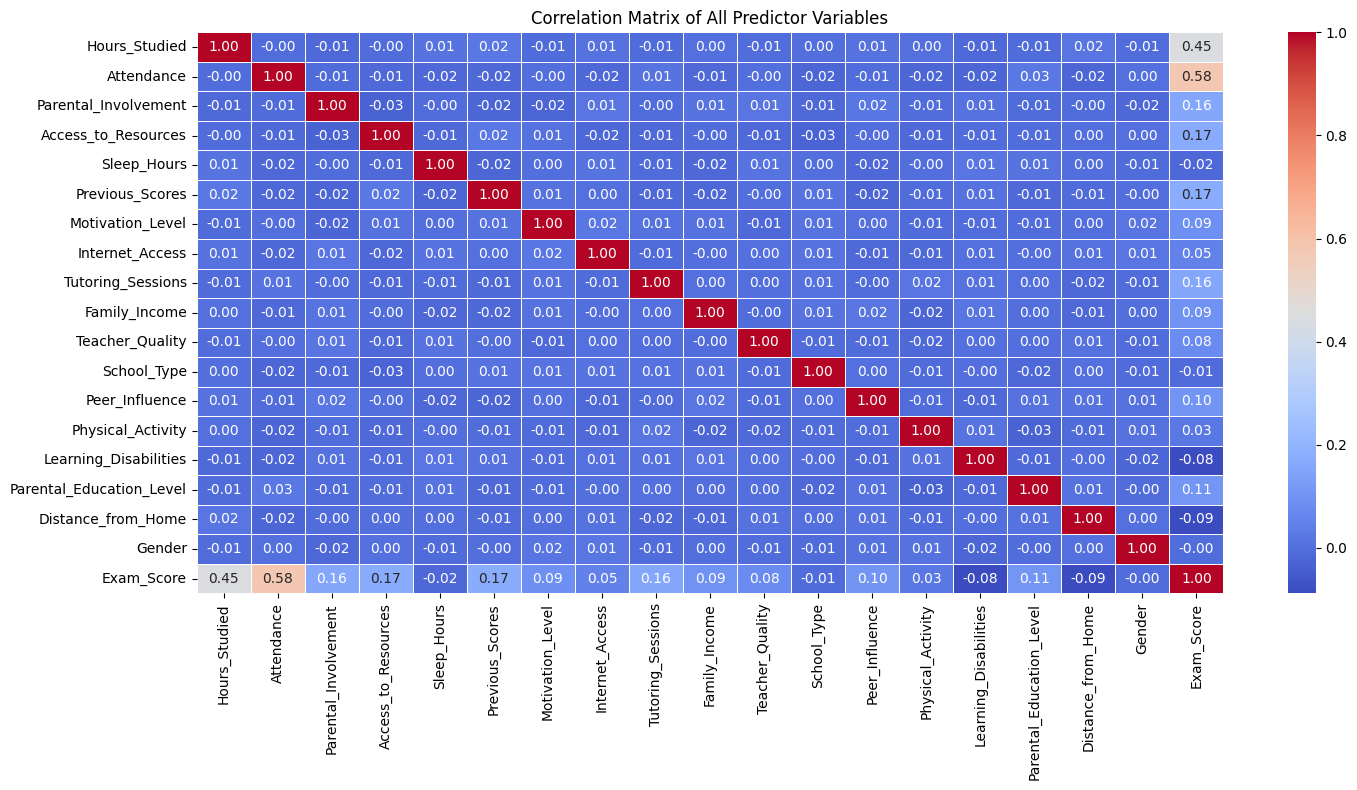

In [ ]:
corr_vars=spf.drop(["Extracurricular_Activities"],axis=1)

corr_matrix = corr_vars.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


plt.title('Correlation Matrix of All Predictor Variables')
plt.tight_layout()
plt.show()

Based on the heatmap, there seems to be no collinearity among predictor variables.

In [ ]:
corr_matrix2=spf.corr()
corr_matrix2["Extracurricular_Activities"].abs().sort_values(ascending=False)



,Extracurricular_Activities
Extracurricular_Activities,1.000000
Exam_Score,0.063063
Parental_Involvement,0.022678
Motivation_Level,0.015795
Teacher_Quality,0.015479
Distance_from_Home,0.013910
Access_to_Resources,0.012197
Learning_Disabilities,0.011197
Peer_Influence,0.008873
Hours_Studied,0.008377


All of the predictors have a small correlation with Extracurricular_Activities, so we will use the feature selection algorithm from the RandomForestClassifier.

We have observed that using the MinMaxScalor vs. standard scalor does not change the correlation of the predictors.

In [ ]:

X = sc_spf2.drop(["Extracurricular_Activities"],axis=1)
y = sc_spf2["Extracurricular_Activities"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
rf1 = RandomForestClassifier()
rf1.fit(X_train, y_train)
model = SelectFromModel(rf1, prefit=True)
selected_features = X.columns[model.get_support()]
print("Selected Features:\n", selected_features)


Selected Features:
 Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')


selected features by random forest tree are

'Hours_Studied',

'Attendance',

'Sleep_Hours',

'Previous_Scores',

'Tutoring_Sessions',

'Physical_Activity',

'Exam_Score'

These do not change regardless of whether we scale numerical features.

## Step 2. Calculate the confusion matrix, prediction accuracy, prediction error, true positive rate, and true negative rate, and F1 score on your training data set.

In [ ]:
#confusion matrix
y_pred = rf1.predict(X_train)
conf_lr = confusion_matrix(y_train, y_pred)
conf_lr

array([[2069,    0],
       [   0, 3033]])

In [ ]:
#Prediction Accuracy
acc_lr = accuracy_score(y_train, y_pred)
acc_lr

1.0

In [ ]:
# Compute the prediction accuracy from the confusion matrix
accuracy_lr = (conf_lr[0, 0] + conf_lr[1, 1]) / np.sum(conf_lr)
accuracy_lr

1.0

In [ ]:
# Calculate the Prediction Error
error_lr = 1 - acc_lr
error_lr


0.0

In [ ]:
#True Positve Rate
from sklearn.metrics import recall_score

recall_score(y_train, y_pred)

1.0

In [ ]:
# True Negative Rate
from sklearn.metrics import recall_score

recall_score(y_train, y_pred, pos_label=0)

1.0

In [ ]:
# F1 Score
from sklearn.metrics import f1_score

f1_score(y_train, y_pred)

1.0

## Step 3.  Calculate and plot the ROC curve and AUC on your validation data set. Use 5-fold cross-validation on the validation set to calculate the AUC and accuracy of each fold.

In [ ]:
# compute the ROC curve variables
y_prob = rf1.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, y_prob)

In [ ]:
rf_thresholds

array([ inf, 0.8 , 0.79, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 ,
       0.69, 0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59,
       0.58, 0.57, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48,
       0.47, 0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.37, 0.36,
       0.35, 0.3 ])

In [ ]:
roc_rf = pd.DataFrame({
    'False Positive Rate': rf_fpr,
    'True Positive Rate': rf_tpr,
    'Model': 'Logistic Regression'
}, index=rf_thresholds)

roc_sample_df = pd.concat([roc_rf])

px.line(roc_sample_df, x='False Positive Rate', y='True Positive Rate', title='ROC Curve',
        labels={'False Positive Rate': 'False Positive Rate', 'True Positive Rate': 'True Positive Rate'},
        color = 'Model',
        width = 700, height = 500
)

In [ ]:
# AUC
rf_auc = roc_auc_score(y_test, y_prob)
print('Logistic regression AUC:', rf_auc.round(3))

Logistic regression AUC: 0.567


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf1, X_train, y_train, cv=5, scoring='roc_auc')

# Print the cross-validation scores
print('Cross-validation scores:', cv_scores)

Cross-validation scores: [0.51013737 0.51358148 0.5461827  0.52131065 0.53421144]


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
i = 1
for train_index, test_index in skf.split(X_train, y_train):
    clone_rf = clone(rf1)
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    print(test_index)
    clone_rf.fit(X_train_fold, y_train_fold)
    y_pred = clone_rf.predict(X_test_fold)

    auc = roc_auc_score(y_test_fold, y_pred)
    print('Fold %d AUC: %.3f' % (i, auc))
    print('Accuracy: ', accuracy_score(y_test_fold, y_pred))
    i += 1

[   3   15   17 ... 5088 5095 5098]
Fold 1 AUC: 0.526
Accuracy:  0.5905974534769833
[   4    5   10 ... 5083 5085 5099]
Fold 2 AUC: 0.498
Accuracy:  0.5670910871694417
[   1   11   14 ... 5093 5097 5100]
Fold 3 AUC: 0.510
Accuracy:  0.5705882352941176
[   2    6    9 ... 5086 5092 5096]
Fold 4 AUC: 0.497
Accuracy:  0.5598039215686275
[   0    7    8 ... 5078 5094 5101]
Fold 5 AUC: 0.494
Accuracy:  0.557843137254902
